### Center for Economic Opportunity Poverty Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv
import dateutil
import os
%matplotlib inline

In [2]:
puma_09 = pd.read_csv('2009 NYC Web Dataset.csv')
puma_09.columns

/Users/shalmali/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (302) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG',
       'ADJINC', 'WGTP', 'NP',
       ...
       'MOOP', 'HEAP', 'WIC', 'FoodStamps', 'SchoolLunch', 'SchoolBreakfast',
       'FICAtax', 'IncomeTax', 'CD', 'Nabe'],
      dtype='object', length=506)

In [3]:
puma_09.Povunit.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
puma_09.iloc[:,476:].head()

,Boro,Povunit,Povrel,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,EducAttain,CitizenStatus,AgeCateg,...,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,FICAtax,IncomeTax,CD,Nabe
0,4,1,1,2,6,3,1,2,2,2,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,39,39
1,4,1,2,2,6,3,1,2,3,2,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,39,39
2,2,1,1,4,4,2,2,3,3,2,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25
3,2,1,4,4,4,2,2,1,3,2,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25
4,2,1,4,4,4,2,2,1,3,2,...,710.00,0,0.0,0.0,0.0,0,2064.425940,-11038.890975,24,25


In [5]:
from pylab import *

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap=cm.coolwarm, interpolation='none')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

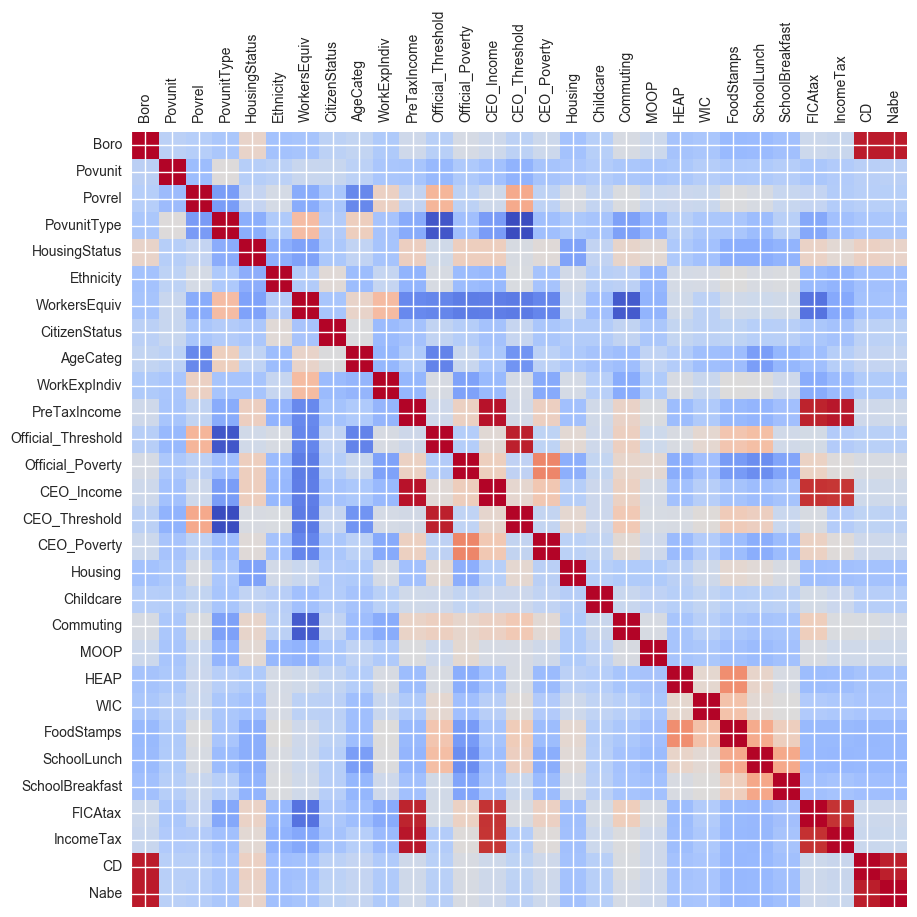

In [6]:
plot_corr(puma_09.iloc[:,476:])

## Heatmap of Correlation coefficient between variables

In [7]:
puma_09.iloc[:,476:].corr()

,Boro,Povunit,Povrel,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,CitizenStatus,AgeCateg,WorkExpIndiv,...,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,FICAtax,IncomeTax,CD,Nabe
Boro,1.000000,0.008557,-0.012957,-0.072765,0.276690,-0.104487,-0.092644,0.012478,0.050131,-0.053344,...,0.098569,-0.097337,-0.075491,-0.157109,-0.148928,-0.114129,0.096764,0.080779,0.963506,0.963557
Povunit,0.008557,1.000000,-0.136313,0.202550,-0.024895,0.013332,0.082254,0.073381,0.015127,-0.076036,...,-0.087238,-0.064363,-0.024471,-0.053202,-0.046854,-0.021511,-0.072854,-0.044177,-0.004611,0.000480
Povrel,-0.012957,-0.136313,1.000000,-0.302789,0.055681,0.139911,-0.233438,-0.075214,-0.389729,0.299720,...,0.087282,0.092507,0.088460,0.179934,0.152322,0.071362,0.055215,-0.032725,-0.002511,-0.016210
PovunitType,-0.072765,0.202550,-0.302789,1.000000,-0.217422,-0.054521,0.428699,-0.037591,0.316687,-0.092310,...,-0.178626,-0.010233,-0.072294,-0.076289,-0.134804,-0.000786,-0.248008,-0.117171,-0.078403,-0.074056
HousingStatus,0.276690,-0.024895,0.055681,-0.217422,1.000000,-0.214926,-0.272581,-0.064643,0.037438,-0.094499,...,0.230757,-0.056488,-0.102764,-0.219957,-0.216728,-0.188760,0.290967,0.231909,0.300870,0.276416
Ethnicity,-0.104487,0.013332,0.139911,-0.054521,-0.214926,1.000000,-0.032207,0.220087,-0.137618,0.063317,...,-0.164863,0.141158,0.147978,0.192851,0.159336,0.171550,-0.157734,-0.185902,-0.118964,-0.118993
WorkersEquiv,-0.092644,0.082254,-0.233438,0.428699,-0.272581,-0.032207,1.000000,-0.086954,0.277287,0.431569,...,-0.185072,0.115928,0.007332,0.108580,0.097426,0.118790,-0.471573,-0.244740,-0.101360,-0.092285
CitizenStatus,0.012478,0.073381,-0.075214,-0.037591,-0.064643,0.220087,-0.086954,1.000000,0.180524,-0.146093,...,-0.064420,0.045125,0.008276,0.022917,-0.016720,-0.012180,-0.068649,-0.096202,0.018006,0.022257
AgeCateg,0.050131,0.015127,-0.389729,0.316687,0.037438,-0.137618,0.277287,0.180524,1.000000,-0.176071,...,0.037569,-0.026238,-0.125079,-0.128203,-0.294703,-0.173251,-0.120887,-0.014662,0.055487,0.057173
WorkExpIndiv,-0.053344,-0.076036,0.299720,-0.092310,-0.094499,0.063317,0.431569,-0.146093,-0.176071,1.000000,...,-0.045311,0.156295,0.077266,0.191130,0.189263,0.109316,-0.227827,-0.150668,-0.049543,-0.051525


In [92]:
trial = puma_09.iloc[:,476:]

In [93]:
trial.columns

Index(['Boro', 'Povunit', 'Povrel', 'PovunitType', 'HousingStatus',
       'Ethnicity', 'WorkersEquiv', 'EducAttain', 'CitizenStatus', 'AgeCateg',
       'WorkExpIndiv', 'PreTaxIncome', 'Official_Threshold',
       'Official_Poverty', 'CEO_Income', 'CEO_Threshold', 'CEO_Poverty',
       'Housing', 'Childcare', 'Commuting', 'MOOP', 'HEAP', 'WIC',
       'FoodStamps', 'SchoolLunch', 'SchoolBreakfast', 'FICAtax', 'IncomeTax',
       'CD', 'Nabe'],
      dtype='object')

In [94]:
trial.CEO_Poverty.value_counts()

2    51230
1    11836
Name: CEO_Poverty, dtype: int64

In [95]:
trial = trial[['Boro','Nabe','PovunitType', 'HousingStatus',
       'Ethnicity', 'WorkersEquiv', 'AgeCateg','PreTaxIncome', 
       'Housing', 'Childcare', 'Commuting', 'MOOP', 'HEAP', 'WIC',
       'FoodStamps', 'SchoolLunch', 'SchoolBreakfast', 'FICAtax', 'IncomeTax',
        'CEO_Threshold', 'CEO_Poverty']]

In [96]:
trial.head(2)

,Boro,Nabe,PovunitType,HousingStatus,Ethnicity,WorkersEquiv,AgeCateg,PreTaxIncome,Housing,Childcare,...,MOOP,HEAP,WIC,FoodStamps,SchoolLunch,SchoolBreakfast,FICAtax,IncomeTax,CEO_Threshold,CEO_Poverty
0,4,39,2,6,3,1,2,33782.424,0.0,0.0,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,19124.177185,2
1,4,39,2,6,3,1,2,33782.424,0.0,0.0,...,635.68,0,0.0,0.0,0.0,0,2584.355436,4015.360096,19124.177185,2


In [97]:
trial.CEO_Poverty[trial.CEO_Poverty == 2] = 0

In [98]:
trial.CEO_Poverty.value_counts()

0    51230
1    11836
Name: CEO_Poverty, dtype: int64

In [99]:
y = trial.loc[:,"CEO_Poverty"]
X = trial.loc[:,"PovunitType":"CEO_Threshold"]

In [100]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [101]:
X_train.shape

(44146, 18)

In [102]:
X.dtypes

PovunitType          int64
HousingStatus        int64
Ethnicity            int64
WorkersEquiv         int64
AgeCateg             int64
PreTaxIncome       float64
Housing            float64
Childcare          float64
Commuting          float64
MOOP               float64
HEAP                 int64
WIC                float64
FoodStamps         float64
SchoolLunch        float64
SchoolBreakfast      int64
FICAtax            float64
IncomeTax          float64
CEO_Threshold      float64
dtype: object

In [103]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs

rf=DTC()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

1.0

In [104]:
rf.score(X_test,Y_test)

0.99085623678646939

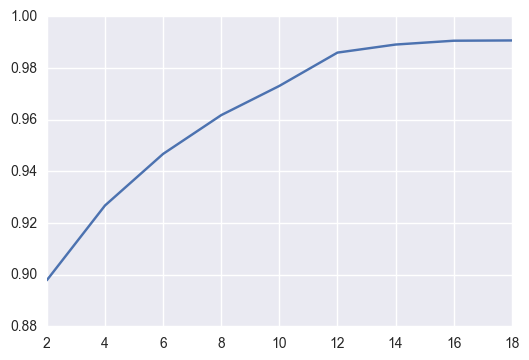

In [105]:
## #Use OS accuracy.
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.3,random_state=999)
OS=[]
for i in range(2,20,2):
    rf=DTC(max_depth=i)
    rf.fit(X_train,Y_train)
    OS.append(rf.score(X_test,Y_test))
    
plt.plot(range(2,20,2),OS)

In [106]:
rf = DTC(max_depth=12)
rf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [107]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
5,PreTaxIncome,0.61312
6,Housing,0.100001
17,CEO_Threshold,0.0882265
9,MOOP,0.0696308
16,IncomeTax,0.0288587


In [108]:
X_train_simple=X_train.loc[:,["PreTaxIncome","Housing","CEO_Threshold","MOOP","IncomeTax"]]
X_test_simple = X_test.loc[:,["PreTaxIncome","Housing","CEO_Threshold","MOOP","IncomeTax"]]

In [109]:
#Let's see the performance of this simple model:
real=np.array(Y_test.apply(int))
rf = DTC(max_leaf_nodes=12) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, Y_train)
pred=rf.predict_proba(X_test_simple)[:,1]
print("The AUC score for this simple model with 5 features is : {}".format(rs(real,pred)))

The AUC score for this simple model with 5 features is : 0.9441384556280903


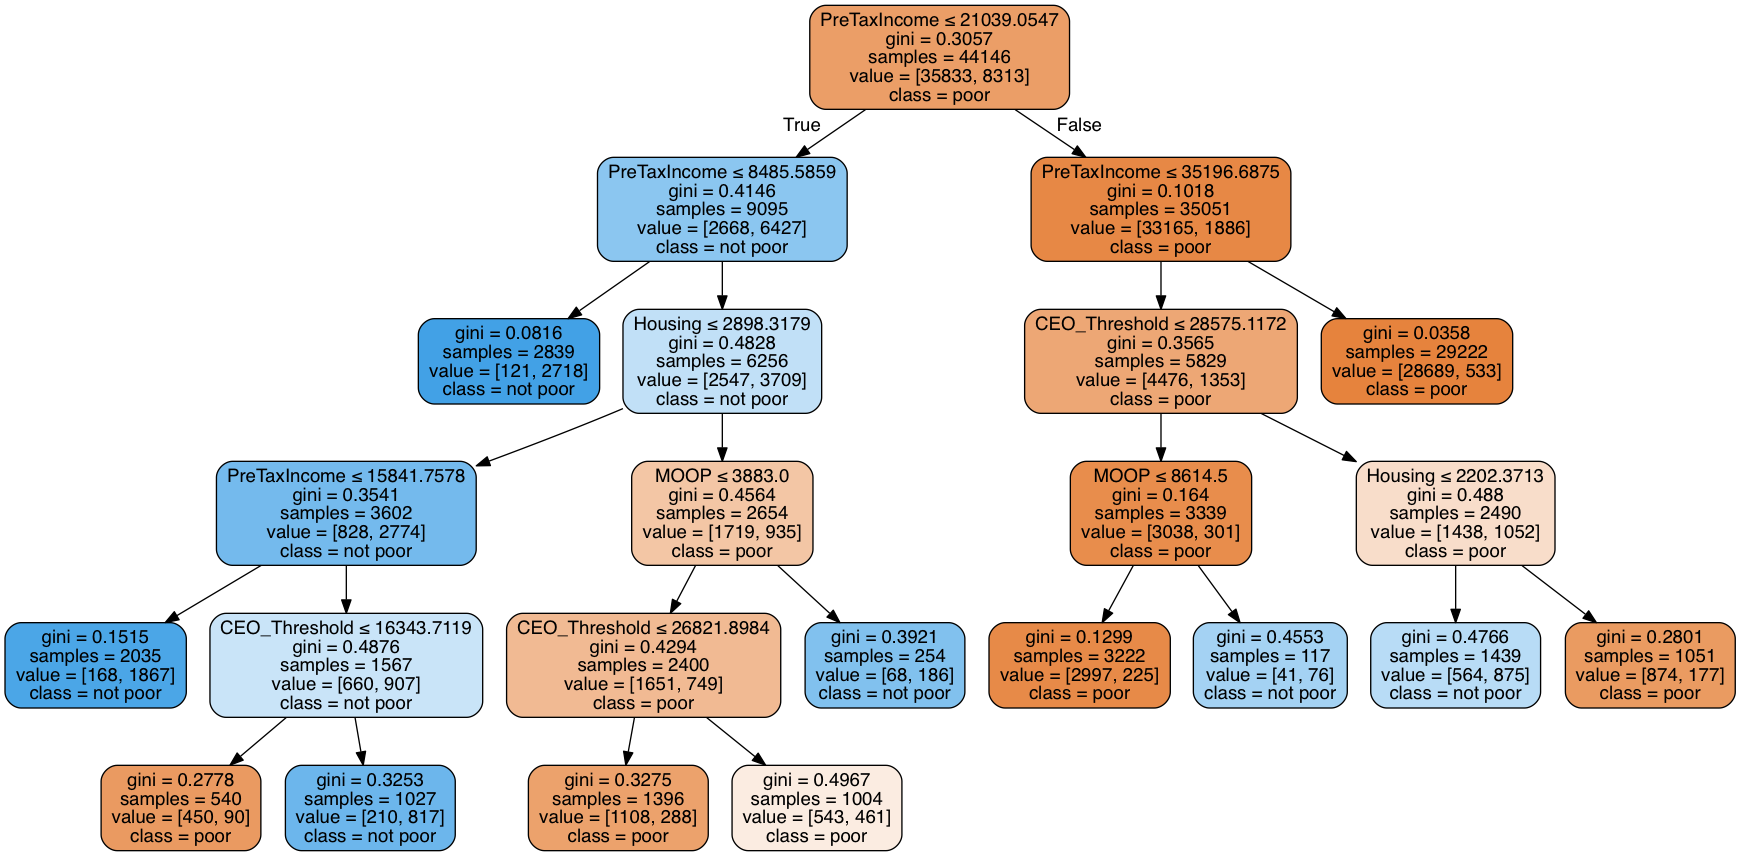

In [110]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(rf, out_file=dot_data,  
                         feature_names=["PreTaxIncome","Housing","CEO_Threshold","MOOP","IncomeTax"],  
                         class_names=["poor","not poor"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  